# AHC

In [15]:
import random
import matplotlib.pyplot as plt
# you are not allowed to import any other libraries

In [16]:
import random
random.seed(722)
# Generate 100 observations in R^3
observations = [(random.randint(-50, 50), random.randint(-50, 50), random.randint(-50, 50)) for _ in range(100)]
#print(observations)

In [17]:
def distance(point1, point2):
    s= sum((a - b) ** 2 for a, b in zip(point1, point2))
    return pow(s, 0.5)
    # returns a number which is the Euclidean distance between the two points

In [18]:
# Write your code for Task 3 here; you may use the following template
class Node:
    def __init__(self, cluster, height=0, leftChild=None, rightChild=None):
        # write the content of the constructor here;
        # this constructor is used to initalize the single-point clusters in AHC
        self.cluster = cluster
        self.height = height
        self.leftChild = leftChild
        self.rightChild = rightChild
        
currentClusters = [Node([point], 0) for point in observations]

In [19]:
def singleLinkage(node1, node2):
    min_distance = float('inf')  # Set initial minimum distance to infinity
    for point1 in node1.cluster:
        for point2 in node2.cluster:
            dist = distance(point1, point2)  
            min_distance = min(min_distance, dist)
    return min_distance

def completeLinkage(node1, node2):
    maxdistance = 0
    for point1 in node1.cluster:
        for point2 in node2.cluster:
            dist = distance(point1, point2)
            maxdistance = max(maxdistance, dist)
    return maxdistance

def averageLinkage(node1, node2):
    cal = sum(distance(point1, point2) for point1 in node1.cluster for point2 in node2.cluster) 
    node1_ps = len(node1.cluster)
    node2_ps = len(node2.cluster)
    aveLink = cal / (node1_ps * node2_ps)
    return aveLink

def centroidLinkage(node1, node2):
    cent1 = [sum(x) / len(node1.cluster) for x in zip(*node1.cluster)]
    cent2 = [sum(x) / len(node2.cluster) for x in zip(*node2.cluster)]
    return distance(cent1, cent2)

In [20]:
def clustersToMerge(currentClusters, linkage): # when this function is used,
    #   linkage should be one of the four linkage functions you implemented for Task 4
    # write the content of this function
    # returns a tuple (i,j,h) which indicates that the i-th and j-th nodes should be merged next
    min_distance = float('inf')
    nodes_to_merge = (0, 0, 0)

    for i in range(len(currentClusters)):
        for j in range(i+1, len(currentClusters)):

            dist = linkage(currentClusters[i], currentClusters[j])
            
            if dist < min_distance:
                min_distance = dist
                nodes_to_merge = (i, j, dist)
    return nodes_to_merge

merge_nodes = clustersToMerge(currentClusters, completeLinkage)
print(f"Clusters to merge: {merge_nodes}")

Clusters to merge: (14, 73, 2.449489742783178)


In [21]:
#To confirm algorithm works as expected
print(distance(observations[14], observations[73]))

2.449489742783178


In [22]:
def ahc(observations, linkage):
    # write the content of this function
    # returns the root node of the AHC tree
    currentClusters = [Node([observation], 0) for observation in observations]
    
    while len(currentClusters) > 1:   
        i, j, h = clustersToMerge(currentClusters, linkage)        

        merged_cluster = Node(None)
        merged_cluster.cluster = currentClusters[i].cluster + currentClusters[j].cluster  # Combine clusters
        merged_cluster.height = h
        merged_cluster.leftChild = currentClusters[i]
        merged_cluster.rightChild = currentClusters[j]
        
        currentClusters.pop(j)
        currentClusters.pop(i)
        currentClusters.append(merged_cluster)
    return currentClusters[0]

In [23]:
def cutTree(rootNode, k):
    # write the content of this function
    # returns the k clusters obtained by cutting the AHC tree at an appropriate height
    # Initialize an empty list to store clusters
    clusters = []
    heights = []

    def traverse(node):
        if node is not None:
            if node.leftChild is None and node.rightChild is None:
                clusters.append(node.cluster)
                heights.append(node.height)
            else:
                traverse(node.leftChild)
                traverse(node.rightChild)

    traverse(root)

    # Sort clusters based on heights
    sorted_clusters = [x for _, x in sorted(zip(heights, clusters))]
    
    return sorted_clusters[:k]

In [24]:
node7 = Node([7], 4)
node6 = Node([6], 3)
node5 = Node([5], 2)
node4 = Node([4], 2)
node3 = Node([3], 3, node6, node7)
node2 = Node([2], 2, node4, node5)
root = Node([1], 1, node2, node3)

# Cut the tree into k clusters
k = 2
result = cutTree(root, k)

# Display the clusters obtained
for i, cluster in enumerate(result):
    print(f"Cluster {i + 1}: {cluster}")

Cluster 1: [4]
Cluster 2: [5]


In [25]:
def plot3D(observations, clusters, linkageFunction):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    cluster_labels = []

    for i, cluster in enumerate(clusters):
        x, y, z = zip(*cluster)
        ax.scatter(x, y, z, label=f'Cluster {i + 1}', c=colors[i])
        cluster_labels.append(f'Cluster {i + 1}')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('AHC Clustering ({})'.format(linkageFunction))
    ax.legend(cluster_labels)
    plt.tight_layout()
    plt.show()

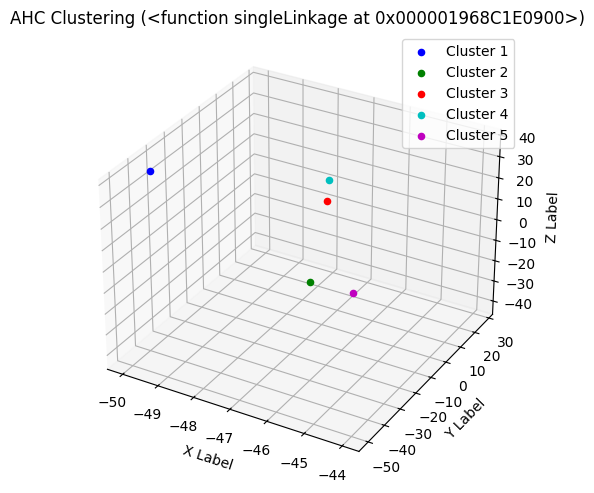

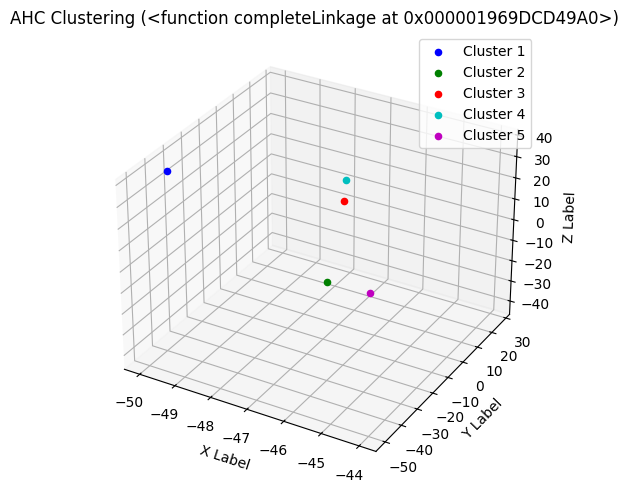

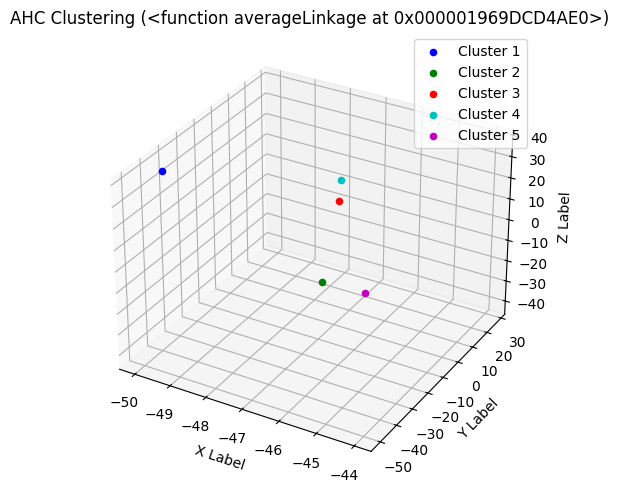

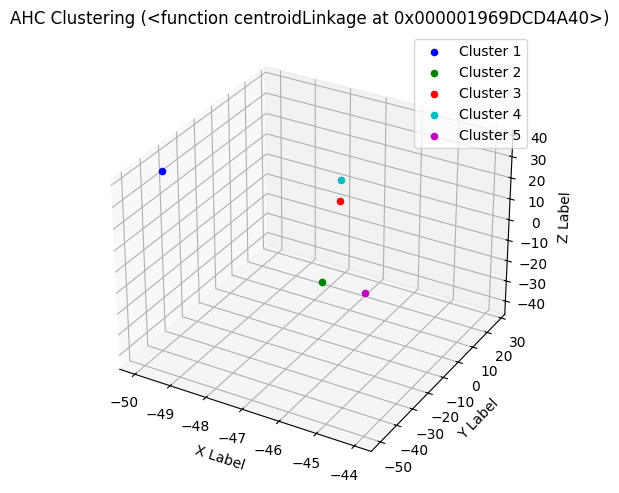

In [26]:
linkages = [singleLinkage, completeLinkage, averageLinkage, centroidLinkage]
for linkage in linkages:
    root = ahc(observations, linkage)
    clusters = cutTree(root, k=5)
    plot3D(observations, clusters, linkage)

# Observation
From the different plots, there seems to be similar output for all the four linkage functions. Therefore, the same clusters are produced for all linkage functions.